## Dependencies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import inflection
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

## Load the dataset

In [2]:
df = pd.read_csv('../dataset/employee_attrition.csv')
df.sample()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
194,excludedPoultry2,101560,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,20.0,+6289713525xxx,excludedPoultry2788@hotmail.com,Sarjana,1,NaN,tidak_bisa_remote,1987-11-25,2009-10-26,2016-04-02,2014-8-19


## Lowercase column names

In [3]:
df.columns = [inflection.underscore(col) for col in df.columns]
df.sample(5)

,username,enterprise_id,status_pernikahan,jenis_kelamin,status_kepegawaian,pekerjaan,jenjang_karir,performance_pegawai,asal_daerah,hiring_platform,skor_survey_engagement,skor_kepuasan_pegawai,jumlah_keikutsertaan_projek,jumlah_keterlambatan_sebulan_terakhir,jumlah_ketidakhadiran,nomor_hp,email,tingkat_pendidikan,pernah_bekerja,ikut_program_lop,alasan_resign,tanggal_lahir,tanggal_hiring,tanggal_penilaian_karyawan,tanggal_resign
118,cruelGnu6,106599,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,LinkedIn,4,5.0,0.0,0.0,15.0,+6281209169xxx,cruelGnu6026@gmail.com,Sarjana,1,NaN,masih_bekerja,1975-09-30,2012-10-02,2020-2-14,-
34,mereCaribou1,106529,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,3,3.0,0.0,0.0,2.0,+6282206634xxx,mereCaribou1593@gmail.com,Sarjana,1,NaN,masih_bekerja,1988-07-10,2014-9-29,2020-2-18,-
275,spiritedWeaver4,106225,Lainnya,Pria,FullTime,Product Manager,Mid_level,Biasa,Jakarta Selatan,LinkedIn,2,3.0,0.0,0.0,14.0,+6281336578xxx,spiritedWeaver4174@hotmail.com,Doktor,1,NaN,jam_kerja,1992-08-17,2011-11-07,2020-01-08,2018-06-08
269,awedBaboon6,100973,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,7.0,+6289931606xxx,awedBaboon6031@proton.com,Sarjana,1,NaN,NaN,1972-09-11,2012-11-05,2020-1-17,-
136,lovesickRhino0,105734,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,LinkedIn,1,3.0,6.0,3.0,2.0,+6287885203xxx,lovesickRhino0235@hotmail.com,Sarjana,1,NaN,tidak_bahagia,1987-06-18,2015-3-30,2020-02-04,2015-04-01


## Pre-exploration

#### Size of the dataset

In [4]:
df.shape

(287, 25)

#### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   username                               287 non-null    object 
 1   enterprise_id                          287 non-null    int64  
 2   status_pernikahan                      287 non-null    object 
 3   jenis_kelamin                          287 non-null    object 
 4   status_kepegawaian                     287 non-null    object 
 5   pekerjaan                              287 non-null    object 
 6   jenjang_karir                          287 non-null    object 
 7   performance_pegawai                    287 non-null    object 
 8   asal_daerah                            287 non-null    object 
 9   hiring_platform                        287 non-null    object 
 10  skor_survey_engagement                 287 non-null    int64  
 11  skor_k

#### Data types, missing values, and unique value

In [6]:
from common_function import dataset_summary
summary = dataset_summary(df)
summary

,variable,no_unique,pandas_dtype,missing_value,%_missing_values,unique_value
0,username,285,object,0,0.000000,"[spiritedPorpoise3, jealousGelding2, pluckyMue..."
1,enterprise_id,287,int64,0,0.000000,"[111065, 106080, 106452, 106325, 111171, 10641..."
2,status_pernikahan,5,object,0,0.000000,"[Belum_menikah, Menikah, Bercerai, Lainnya, -]"
3,jenis_kelamin,2,object,0,0.000000,"[Pria, Wanita]"
4,status_kepegawaian,3,object,0,0.000000,"[Outsource, FullTime, Internship]"
5,pekerjaan,14,object,0,0.000000,"[Software Engineer (Back End), Data Analyst, S..."
6,jenjang_karir,3,object,0,0.000000,"[Freshgraduate_program, Senior_level, Mid_level]"
7,performance_pegawai,5,object,0,0.000000,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
8,asal_daerah,5,object,0,0.000000,"[Jakarta Timur, Jakarta Utara, Jakarta Pusat, ..."
9,hiring_platform,9,object,0,0.000000,"[Employee_Referral, Website, Indeed, LinkedIn,..."


**Observasi**
* Dataset memiliki **287 baris** dan **25 kolom** yang terdiri dari 6 kolom numerical, 17 kolom kategorikal, dan 2 unique identifier.
* Ada **6 feature** yang memiliki missing values yang mana paling banyak terdapat missing values adalah kolom **ikut_program_lop** (89,8%) dan **alasan_resign** (23%). Selain kedua feature tersebut, hanya terdapat kurang dari 3%.
* Pada feature **pernah_bekerja** hanya terdapat satu unique value namun dalam penulisan masih ada yang 'Yes' dan 1 sehingga perlu di-rename.
* Kolom tanggal dan kolom jumlah memiliki tipe data yang belum sesuai yang mana seharusnya masing-masing datetime dan int64.

In [7]:
numerical = [
    'ikut_program_lop', 'jumlah_ketidakhadiran', 'skor_kepuasan_pegawai', 'jumlah_keikutsertaan_projek', 
    'jumlah_keterlambatan_sebulan_terakhir', 'skor_survey_engagement', 
]

categorical = [
    'alasan_resign', 'tanggal_penilaian_karyawan', 'tanggal_hiring', 'tanggal_lahir', 'pernah_bekerja',
    'tingkat_pendidikan', 'email', 'nomor_hp', 'hiring_platform', 'asal_daerah', 'performance_pegawai',
    'jenjang_karir', 'pekerjaan', 'status_kepegawaian', 'jenis_kelamin' , 'tanggal_resign', 'status_pernikahan'
]

identifier = ['username', 'enterprise_id']

#### Descriptive Statistics

In [8]:
df[numerical].describe().round(1)

,ikut_program_lop,jumlah_ketidakhadiran,skor_kepuasan_pegawai,jumlah_keikutsertaan_projek,jumlah_keterlambatan_sebulan_terakhir,skor_survey_engagement
count,29.0,281.0,282.0,284.0,286.0,287.0
mean,0.5,10.4,3.9,1.2,0.4,3.1
std,0.5,6.9,0.9,2.3,1.3,0.8
min,0.0,1.0,1.0,0.0,0.0,1.0
25%,0.0,5.0,3.0,0.0,0.0,3.0
50%,1.0,10.0,4.0,0.0,0.0,3.0
75%,1.0,15.0,5.0,0.0,0.0,4.0
max,1.0,55.0,5.0,8.0,6.0,5.0


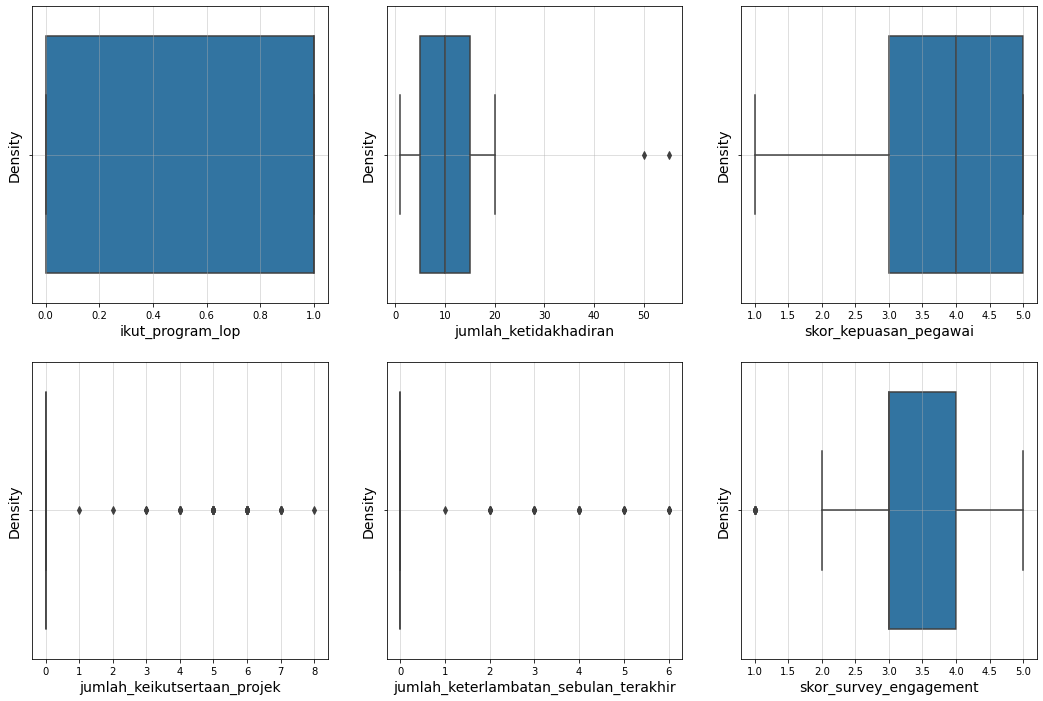

In [9]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(axis='x', alpha=0.5)
    plt.grid(axis='y', alpha=0.5)

plt.show()

In [10]:
desc_cats = df[categorical].describe().T
desc_cats['frac'] = 100 * desc_cats['freq'] / desc_cats['count']
desc_cats

,count,unique,top,freq,frac
alasan_resign,221,11,masih_bekerja,132,59.728507
tanggal_penilaian_karyawan,287,127,2020-1-14,17,5.923345
tanggal_hiring,287,97,2011-01-10,12,4.181185
tanggal_lahir,287,284,1987-06-14,2,0.696864
pernah_bekerja,287,2,1,286,99.651568
tingkat_pendidikan,287,3,Sarjana,176,61.324042
email,287,287,spiritedPorpoise3135@yahoo.com,1,0.348432
nomor_hp,287,287,+6282232522xxx,1,0.348432
hiring_platform,287,9,Indeed,85,29.616725
asal_daerah,287,5,Jakarta Pusat,72,25.087108


## Data Preparation

In [11]:
df2 = df.copy()

### Handle missing values

Berikut ini strategi untuk mengisi missing values yaitu.
* **ikut_program_lop**: di-impute dengan nilai **0** karena missing values di kolom dapat diartikan sebagai karyawan yang tidak ikut program lop.
* **alasan_resign**: diisi dengan **masih_bekerja** karena dengan asumsi karyawan tidak resign resign.
* **jumlah_ketidakhadiran**: di-impute dengan nilai **0** karena bisa diasumsikan karyawan tersebut tidak pernah absen.
* **skor_kepuasan_pegawai**: di-impute dengan nilai **4** agar karyawan yang belum memiliki skor dapat dianggap netral.
* **jumlah_keikutsertaan_projek**: di-impute dengan nilai **0** karena berasumsi karyawan belum di-assign ke projek manapun.
* **jumlah_keterlambatan_sebulan_terakhir**: di-impute dengan nilai **0** karena bisa diasumsikan karyawan tersebut tidak pernah terlambat.

In [12]:
zero_imputation_cols = [
    'ikut_program_lop', 'jumlah_ketidakhadiran', 
    'jumlah_keikutsertaan_projek', 'jumlah_keterlambatan_sebulan_terakhir'
]
for col in zero_imputation_cols:
    df2[col] = df2[col].fillna(0)

df2['alasan_resign'] = df2['alasan_resign'].fillna('masih_bekerja')
df2['skor_kepuasan_pegawai'] = df2['skor_kepuasan_pegawai'].fillna(4)

In [13]:
df2.sample(2)

,username,enterprise_id,status_pernikahan,jenis_kelamin,status_kepegawaian,pekerjaan,jenjang_karir,performance_pegawai,asal_daerah,hiring_platform,skor_survey_engagement,skor_kepuasan_pegawai,jumlah_keikutsertaan_projek,jumlah_keterlambatan_sebulan_terakhir,jumlah_ketidakhadiran,nomor_hp,email,tingkat_pendidikan,pernah_bekerja,ikut_program_lop,alasan_resign,tanggal_lahir,tanggal_hiring,tanggal_penilaian_karyawan,tanggal_resign
125,cruelWidgeon9,106608,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Utara,Google_Search,3,4.0,0.0,0.0,9.0,+6281287214xxx,cruelWidgeon9579@hotmail.com,Sarjana,1,0.0,masih_bekerja,1982-08-25,2011-01-10,2020-02-07,-
96,cockyBuzzard5,110932,Menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,4.0,0.0,0.0,19.0,+6289794136xxx,cockyBuzzard5324@proton.com,Sarjana,1,0.0,masih_bekerja,1966-03-17,2014-05-05,2020-1-21,-


### Replace incorrect values

Berikut ini feature-feature yang memiliki values yang incorrect
* **status_pernikahan**: terdapat value **'-'** yang dapat di-replace dengan **Lainnya**.
* **tanggal_resign**: terdapat value **'-'** yang di-replace dengan **hari ini (2022-08-21)** yang menunjukkan belum resign. Namun, agar lebih representatif maka perlu dibuat feature baru yaitu **resign** yang berisi Yes or No.
* **pernah_bekerja**: terdapat value **1** yang dapat diganti dengan **Yes**.

In [14]:
df2['status_pernikahan'] = df2['status_pernikahan'].str.replace('-', 'Lainnya')
df2['status_pernikahan'].unique()

array(['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya'], dtype=object)

In [15]:
filter = (df2['tanggal_resign'] == '-')
df2.loc[filter, 'tanggal_resign'] = df2.loc[filter, 'tanggal_resign'].str.replace('-', '2022-08-21')
df2['tanggal_resign'].unique()

array(['2022-08-21', '2018-6-16', '2014-9-24', '2018-09-06', '2019-01-12',
       '2018-9-19', '2019-04-06', '2019-08-04', '2017-09-12',
       '2016-04-04', '2018-2-19', '2016-08-07', '2015-6-15', '2016-08-02',
       '2017-11-15', '2015-01-07', '2013-9-26', '2018-9-23', '2018-06-08',
       '2017-11-04', '2019-06-06', '2020-9-27', '2020-2-25', '2017-3-15',
       '2018-5-17', '2015-6-24', '2015-01-09', '2020-8-19', '2018-11-15',
       '2017-09-05', '2014-8-19', '2013-5-30', '2016-01-11', '2016-10-31',
       '2017-12-15', '2015-6-18', '2014-04-07', '2017-4-15', '2015-04-01',
       '2020-4-29', '2018-04-01', '2016-4-24', '2017-06-04', '2016-01-09',
       '2017-12-12', '2016-3-31', '2015-4-15', '2020-9-26', '2018-9-15',
       '2017-11-14', '2019-9-26', '2015-06-05', '2017-6-25'], dtype=object)

In [16]:
df2['pernah_bekerja'] = df2['pernah_bekerja'].str.replace('1', 'yes')
df2['pernah_bekerja'].unique()

array(['yes'], dtype=object)

### Correct feature data types

Ada beberapa feature yang perlu diubah data types sebagai berikut.
* **float64** to **int64**: skor_kepuasan_pegawai, jumlah_keikutsertaan_projek, jumlah_keterlambatan_sebulan_terakhir, jumlah_ketidakhadiran, ikut_program_lop
* **object** to **datetime**: tanggal_resign, tanggal_penilaian_karyawan, tanggal_hiring, tanggal_lahir

In [17]:
cols_to_int = [
    'skor_kepuasan_pegawai','jumlah_keikutsertaan_projek', 
    'jumlah_keterlambatan_sebulan_terakhir',
    'jumlah_ketidakhadiran', 'ikut_program_lop'
]
for col in cols_to_int:
    df2[col] = df2[col].astype(int)
    
df2[cols_to_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   skor_kepuasan_pegawai                  287 non-null    int64
 1   jumlah_keikutsertaan_projek            287 non-null    int64
 2   jumlah_keterlambatan_sebulan_terakhir  287 non-null    int64
 3   jumlah_ketidakhadiran                  287 non-null    int64
 4   ikut_program_lop                       287 non-null    int64
dtypes: int64(5)
memory usage: 11.3 KB


In [18]:
cols_to_datetime = [
    'tanggal_lahir','tanggal_hiring', 
    'tanggal_penilaian_karyawan', 'tanggal_resign'
]
for col in cols_to_datetime:
    df2[col] = pd.to_datetime(df2[col])
    
df2[cols_to_datetime].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tanggal_lahir               287 non-null    datetime64[ns]
 1   tanggal_hiring              287 non-null    datetime64[ns]
 2   tanggal_penilaian_karyawan  287 non-null    datetime64[ns]
 3   tanggal_resign              287 non-null    datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 9.1 KB


### Drop unimportant features

Feature **pernah_bekerja** dapat di-remove karena hanya terdapat satu unique values saja setelah imputasi missing values.

In [19]:
df2 = df2.drop('pernah_bekerja', axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   username                               287 non-null    object        
 1   enterprise_id                          287 non-null    int64         
 2   status_pernikahan                      287 non-null    object        
 3   jenis_kelamin                          287 non-null    object        
 4   status_kepegawaian                     287 non-null    object        
 5   pekerjaan                              287 non-null    object        
 6   jenjang_karir                          287 non-null    object        
 7   performance_pegawai                    287 non-null    object        
 8   asal_daerah                            287 non-null    object        
 9   hiring_platform                        287 non-null    object    

## Annual Report on Employee Number Changes

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) 

2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu) 

3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna) 

4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya) 

5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan) 

6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

In [20]:
df2['tahun_hiring'] = df2['tanggal_hiring'].dt.year
df2['tahun_resign'] = df2['tanggal_resign'].dt.year
df2[['tahun_hiring', 'tahun_resign']].sample(3)

,tahun_hiring,tahun_resign
175,2013,2019
115,2011,2022
24,2011,2016


In [21]:
hired_employee = df2.groupby('tahun_hiring').agg({"enterprise_id": "count"}).reset_index()
hired_employee.columns = ['tahun', 'jumlah_karyawan_masuk']
hired_employee.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
tahun,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
jumlah_karyawan_masuk,1,2,2,7,8,76,41,43,56,31,14,5,1


In [22]:
resign_employee = df2.groupby('tahun_resign').agg({"enterprise_id": "count"}).reset_index()
resign_employee.columns = ['tahun', 'jumlah_karyawan_keluar']
resign_employee.T

,0,1,2,3,4,5,6,7,8
tahun,2013,2014,2015,2016,2017,2018,2019,2020,2022
jumlah_karyawan_keluar,5,12,8,8,19,26,5,6,198


In [23]:
in_out_employee = hired_employee.merge(resign_employee, how='outer', on='tahun')
in_out_employee.columns = ['tahun', 'jumlah_karyawan_masuk', 'jumlah_karyawan_keluar']

in_out_employee = in_out_employee.fillna(0)
for col in list(in_out_employee.columns):
    in_out_employee[col] = in_out_employee[col].astype(int)

in_out_employee['perubahan_total_karyawan'] = in_out_employee['jumlah_karyawan_masuk'] - in_out_employee['jumlah_karyawan_keluar']
in_out_employee['total_karyawan'] = in_out_employee['perubahan_total_karyawan'].cumsum()


in_out_employee = in_out_employee.iloc[:-1, :]
in_out_employee.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tahun,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
jumlah_karyawan_masuk,1,2,2,7,8,76,41,43,56,31,14,5,1,0,0
jumlah_karyawan_keluar,0,0,0,0,0,0,0,5,12,8,8,19,26,5,6
perubahan_total_karyawan,1,2,2,7,8,76,41,38,44,23,6,-14,-25,-5,-6
total_karyawan,1,3,5,12,20,96,137,175,219,242,248,234,209,204,198


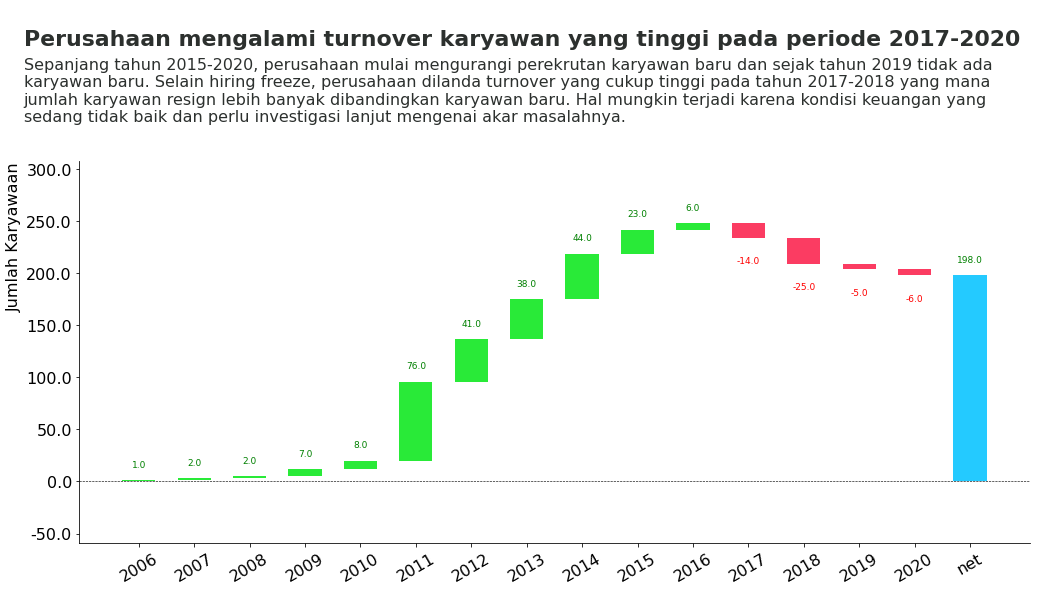

In [24]:
#!pip install waterfallcharts
import waterfall_chart

a = in_out_employee['tahun'].astype(str).tolist()
b = in_out_employee['perubahan_total_karyawan'].astype(int).tolist()

plt.rcParams["figure.figsize"] = (14, 6)
waterfall_chart.plot(a, b)

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

s = """
Perusahaan mengalami turnover karyawan yang tinggi pada periode 2017-2020
"""
plt.text(
    x=xmin - 1, 
    y=ymax*1.38, 
    s=s, 
    fontsize=22,
    fontweight='bold',
    color='#2C302E',
    va='center', 
    ha='left',
)

s = r"""
Sepanjang tahun 2015-2020, perusahaan mulai mengurangi perekrutan karyawan baru dan sejak tahun 2019 tidak ada 
karyawan baru. Selain hiring freeze, perusahaan dilanda turnover yang cukup tinggi pada tahun 2017-2018 yang mana 
jumlah karyawan resign lebih banyak dibandingkan karyawan baru. Hal mungkin terjadi karena kondisi keuangan yang 
sedang tidak baik dan perlu investigasi lanjut mengenai akar masalahnya.
"""
plt.text(
    x=xmin - 1, 
    y=ymax*1.22, 
    s=s, 
    fontsize=16,
    color='#2C302E',
    va='center', 
    ha='left',
)

plt.title('\n', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Jumlah Karyawaan', fontsize=16, loc='top')
sns.despine()
plt.show()

## Resign Reason Analysis for Employee Attrition Management Strategy

In [25]:
df2['alasan_resign'].value_counts()

masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: alasan_resign, dtype: int64

In [26]:
df2['bekerja'] = np.where(df2['alasan_resign'] == 'masih_bekerja', 1, 0)
df2['bekerja'].value_counts()

1    198
0     89
Name: bekerja, dtype: int64

In [27]:
df2['resign'] = np.where(df2['alasan_resign'] != 'masih_bekerja', 1, 0)
df2['resign'].value_counts()

0    198
1     89
Name: resign, dtype: int64

In [28]:
employee_work = df2.groupby('pekerjaan').agg({
    'bekerja': 'sum',
    'resign': 'sum'
})
employee_work = employee_work.reset_index()
employee_work.columns = ['pekerjaan', 'jumlah_karyawan_bertahan', 'jumlah_karyawan_resign']

employee_work['total_karyawan'] = employee_work['jumlah_karyawan_bertahan'] + employee_work['jumlah_karyawan_resign']
employee_work['persentase_karyawan_bertahan'] = 100 * (employee_work['jumlah_karyawan_bertahan'] / employee_work['total_karyawan'])
employee_work = employee_work.sort_values(by='persentase_karyawan_bertahan', ascending=False).reset_index(drop=True)

employee_work

,pekerjaan,jumlah_karyawan_bertahan,jumlah_karyawan_resign,total_karyawan,persentase_karyawan_bertahan
0,DevOps Engineer,3,0,3,100.000000
1,Digital Product Manager,2,0,2,100.000000
2,Machine Learning Engineer,2,0,2,100.000000
3,Product Design (UX Researcher),1,0,1,100.000000
4,Scrum Master,3,0,3,100.000000
5,Software Architect,1,0,1,100.000000
6,Software Engineer (iOS),3,0,3,100.000000
7,Software Engineer (Back End),81,28,109,74.311927
8,Software Engineer (Android),17,7,24,70.833333
9,Data Engineer,7,3,10,70.000000


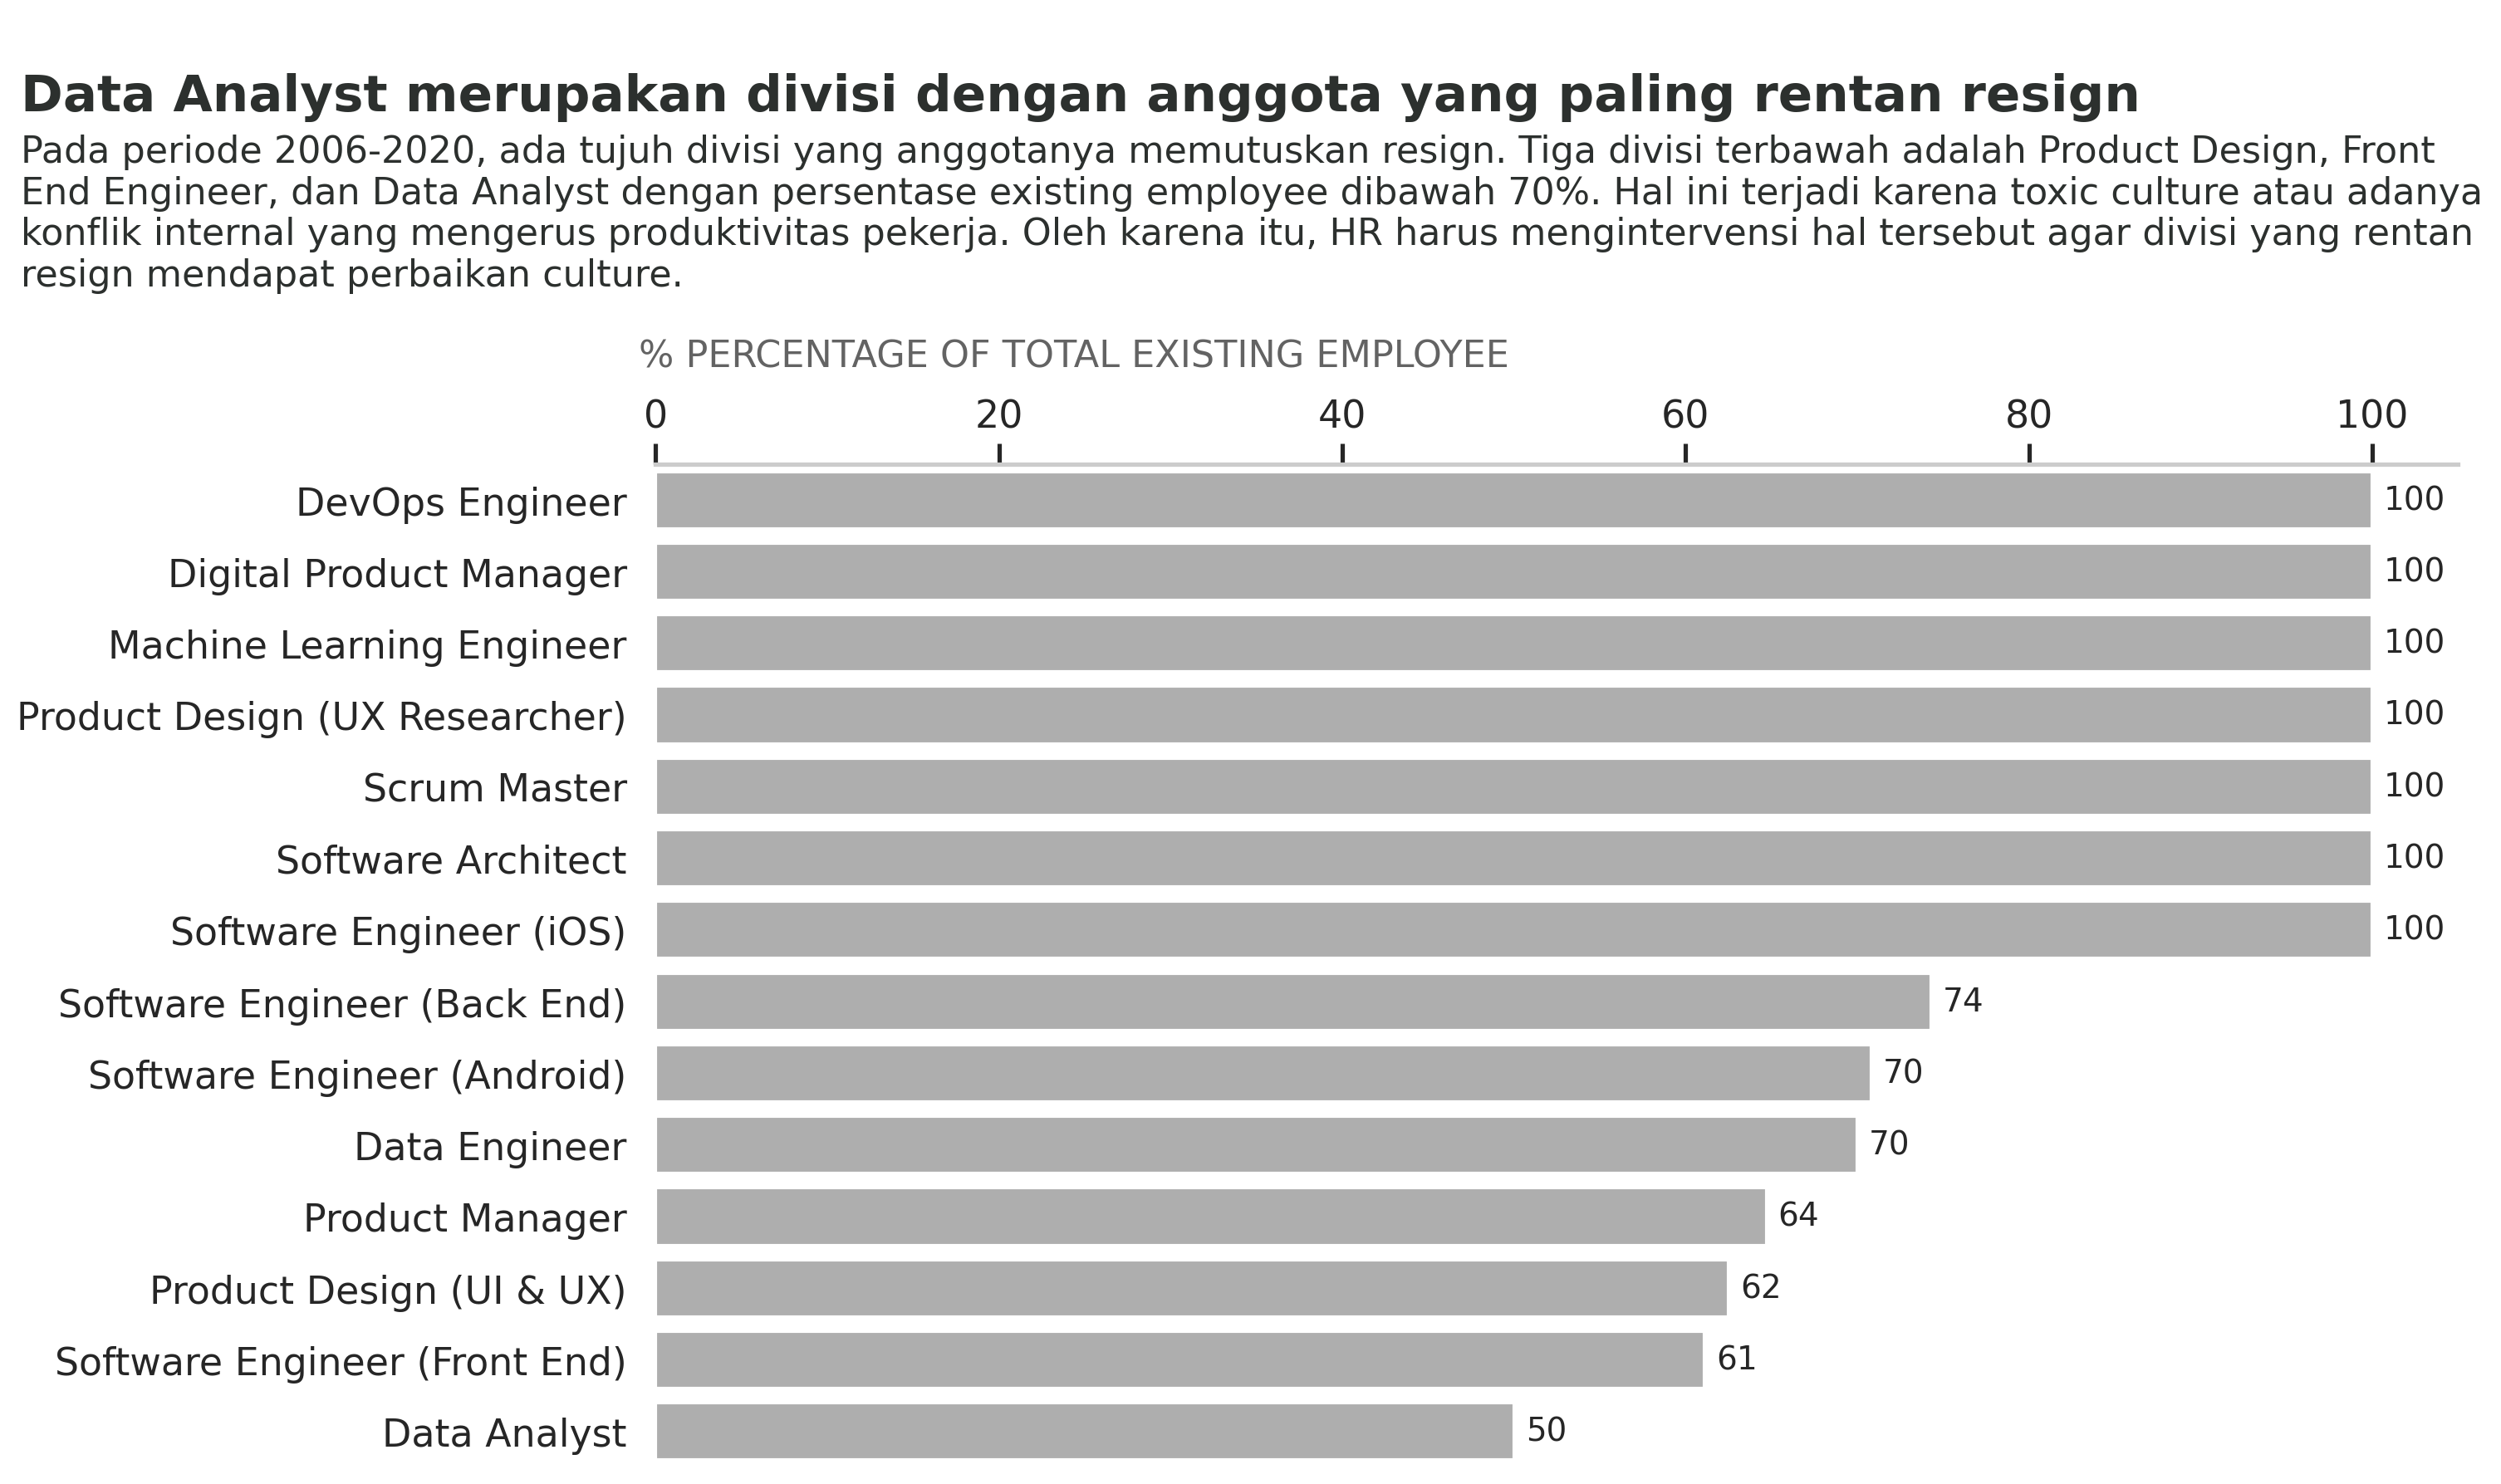

In [29]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
sns.set_theme(context="talk", style="whitegrid")
    
fig, ax = plt.subplots(1, 1, figsize=(14, 8), dpi=200)
sns.barplot(data=employee_work, y='pekerjaan', x='persentase_karyawan_bertahan', ax=ax, color=colors_dark[3])

for position in ['bottom', 'left', 'right']:
    ax.spines[position].set_visible(False)
    
ax.get_xaxis().tick_top()

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        xy=(p.get_width(), p.get_y()+p.get_height()/2),
        xytext=(5, 0), textcoords='offset points',
        ha="left", va="center", fontsize=14
    )
    
s = """
Data Analyst merupakan divisi dengan anggota yang paling rentan resign
"""
ax.text(
    x=xmin - 37, 
    y=ymax*11.25, 
    s=s, 
    fontsize=22,
    fontweight='bold',
    color='#2C302E',
    va='center', 
    ha='left',
)

s = r"""
Pada periode 2006-2020, ada tujuh divisi yang anggotanya memutuskan resign. Tiga divisi terbawah adalah Product Design, Front  
End Engineer, dan Data Analyst dengan persentase existing employee dibawah 70%. Hal ini terjadi karena toxic culture atau adanya
konflik internal yang mengerus produktivitas pekerja. Oleh karena itu, HR harus mengintervensi hal tersebut agar divisi yang rentan 
resign mendapat perbaikan culture.
"""
ax.text(
    x=xmin - 37, 
    y=ymax*8,
    s=s, 
    fontsize=16,
    color='#2C302E',
    va='center', 
    ha='left',
)

ax.text(
    x=xmin - 1, 
    y=ymax*4, 
    s='% PERCENTAGE OF TOTAL EXISTING EMPLOYEE', 
    fontsize=16,
    color=colors_dark[2],
    va='center', 
    ha='left',
)

plt.grid(False)
plt.ylabel('')
plt.xlabel('')
plt.show()

## Data Preprocessing

In [30]:
df3 = df2.drop(columns=['bekerja', 'tahun_hiring', 'tahun_resign']).copy()

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   username                               287 non-null    object        
 1   enterprise_id                          287 non-null    int64         
 2   status_pernikahan                      287 non-null    object        
 3   jenis_kelamin                          287 non-null    object        
 4   status_kepegawaian                     287 non-null    object        
 5   pekerjaan                              287 non-null    object        
 6   jenjang_karir                          287 non-null    object        
 7   performance_pegawai                    287 non-null    object        
 8   asal_daerah                            287 non-null    object        
 9   hiring_platform                        287 non-null    object    

### Handle duplicate data

In [32]:
df3.duplicated().sum()

0

Tidak ada data duplikasi.

### Feature Selection

Feature yang dibuang berdasarkan konteks kebermaknaannya.
* username, enterprise_id, nomor_hp, email, tanggal_lahir, tanggal_hiring: personal identifiable identifier tidak berguna untuk machine learning model.
* jenis_kelamin, status_pernikahan, asal_daerah, hiring_platform: menghindari bias ke salah satu gender, status, kota, platform.
* ikut_program_lop: 94% data bernilai 0 sehingga model akan condong ke salah satu unique value saja.
* tanggal_resign, alasan_resign: dibuang agar tidak membocorkan informasi ke target variable yaitu resign.

In [33]:
features_to_drop = [
    'username', 'enterprise_id', 'status_pernikahan', 'jenis_kelamin',
    'asal_daerah', 'hiring_platform', 'nomor_hp', 'email', 'tanggal_resign',
    'ikut_program_lop', 'tanggal_lahir', 'tanggal_hiring', 'alasan_resign'
]
df3 = df3.drop(columns=features_to_drop)
dataset_summary(df3)

,variable,no_unique,pandas_dtype,missing_value,%_missing_values,unique_value
0,status_kepegawaian,3,object,0,0.0,"[Outsource, FullTime, Internship]"
1,pekerjaan,14,object,0,0.0,"[Software Engineer (Back End), Data Analyst, S..."
2,jenjang_karir,3,object,0,0.0,"[Freshgraduate_program, Senior_level, Mid_level]"
3,performance_pegawai,5,object,0,0.0,"[Sangat_bagus, Sangat_kurang, Bagus, Biasa, Ku..."
4,skor_survey_engagement,5,int64,0,0.0,"[4, 3, 2, 1, 5]"
5,skor_kepuasan_pegawai,5,int64,0,0.0,"[4, 3, 5, 2, 1]"
6,jumlah_keikutsertaan_projek,9,int64,0,0.0,"[0, 4, 6, 7, 3, 5, 1, 2, 8]"
7,jumlah_keterlambatan_sebulan_terakhir,7,int64,0,0.0,"[0, 4, 3, 5, 2, 6, 1]"
8,jumlah_ketidakhadiran,23,int64,0,0.0,"[9, 3, 11, 6, 10, 19, 4, 5, 2, 50, 12, 0, 17, ..."
9,tingkat_pendidikan,3,object,0,0.0,"[Magister, Sarjana, Doktor]"


In [34]:
categorical = ['status_kepegawaian', 'pekerjaan', 'jenjang_karir', 'performance_pegawai', 'alasan_resign']
numerical = [
    'skor_survey_engagement', 'skor_kepuasan_pegawai', 'jumlah_keikutsertaan_projek',
    'jumlah_keterlambatan_sebulan_terakhir', 'jumlah_ketidakhadiran'
]
target = 'resign'

### Feature Engineering

#### Tanggal penilaian karyawan

In [35]:
df3['tahun'] = df3['tanggal_penilaian_karyawan'].dt.year
df3['bulan'] = df3['tanggal_penilaian_karyawan'].dt.month
df3['hari'] = df3['tanggal_penilaian_karyawan'].dt.day

df3[['tanggal_penilaian_karyawan', 'tahun', 'bulan', 'hari']].sample(3)

,tanggal_penilaian_karyawan,tahun,bulan,hari
251,2018-07-02,2018,7,2
133,2020-02-18,2020,2,18
70,2020-02-13,2020,2,13


### Feature Encoding

In [36]:
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

one_hot = OneHotEncoder(
    variables=['status_kepegawaian', 'pekerjaan'],
    drop_last_binary=True
)

karir = ['Freshgraduate_program', 'Mid_level', 'Senior_level']
performa = ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus']
pendidikan = ['Sarjana', 'Magister', 'Doktor']
ordinal = OrdinalEncoder(
    categories=[karir, performa, pendidikan],
    dtype='int64'
    
)
df3 = one_hot.fit_transform(df3)
cols = ['jenjang_karir', 'performance_pegawai', 'tingkat_pendidikan']
df3[cols] = ordinal.fit_transform(df3[cols])
display(
    df.shape, 
    df3.sample(2)
)

(287, 25)

,jenjang_karir,performance_pegawai,skor_survey_engagement,skor_kepuasan_pegawai,jumlah_keikutsertaan_projek,jumlah_keterlambatan_sebulan_terakhir,jumlah_ketidakhadiran,tingkat_pendidikan,tanggal_penilaian_karyawan,resign,tahun,bulan,hari,status_kepegawaian_Outsource,status_kepegawaian_FullTime,status_kepegawaian_Internship,pekerjaan_Software Engineer (Back End),pekerjaan_Data Analyst,pekerjaan_Software Engineer (Front End),pekerjaan_Product Manager,pekerjaan_Software Engineer (Android),pekerjaan_Scrum Master,pekerjaan_Product Design (UX Researcher),pekerjaan_Product Design (UI & UX),pekerjaan_Digital Product Manager,pekerjaan_Data Engineer,pekerjaan_Software Engineer (iOS),pekerjaan_DevOps Engineer,pekerjaan_Software Architect,pekerjaan_Machine Learning Engineer
76,1,3,2,5,0,0,4,1,2020-02-11,0,2020,2,11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
265,0,1,2,2,0,3,4,1,2013-04-12,0,2013,4,12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Split the data

In [37]:
from sklearn.model_selection import train_test_split

X = df3.drop(['tanggal_penilaian_karyawan', 'resign'], axis=1)
y = df3['resign']

# split 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (229, 28)
Test data shape: (58, 28)


In [38]:
X_train.sample()

,jenjang_karir,performance_pegawai,skor_survey_engagement,skor_kepuasan_pegawai,jumlah_keikutsertaan_projek,jumlah_keterlambatan_sebulan_terakhir,jumlah_ketidakhadiran,tingkat_pendidikan,tahun,bulan,hari,status_kepegawaian_Outsource,status_kepegawaian_FullTime,status_kepegawaian_Internship,pekerjaan_Software Engineer (Back End),pekerjaan_Data Analyst,pekerjaan_Software Engineer (Front End),pekerjaan_Product Manager,pekerjaan_Software Engineer (Android),pekerjaan_Scrum Master,pekerjaan_Product Design (UX Researcher),pekerjaan_Product Design (UI & UX),pekerjaan_Digital Product Manager,pekerjaan_Data Engineer,pekerjaan_Software Engineer (iOS),pekerjaan_DevOps Engineer,pekerjaan_Software Architect,pekerjaan_Machine Learning Engineer
223,2,1,4,3,0,0,1,0,2020,2,25,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Handle class imbalance

In [39]:
df3['resign'].value_counts(normalize=True)

0    0.689895
1    0.310105
Name: resign, dtype: float64

Target variabel memiliki distribusi yang imbalance dengan rasio antara kelas minor dan mayor 31:69. Oleh karena itu butuh diseimbangkan dengan resampling. Untuk kasus ini akan menggunakan **SMOTE** untuk me-resampling dataset agar target variable memiliki distribusi yang balance.


In [40]:
from imblearn.over_sampling import SMOTE

over_resampler = SMOTE(sampling_strategy='all', random_state=42)
X_train, y_train = over_resampler.fit_resample(X_train, y_train)

In [41]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: resign, dtype: float64

## Modelling

In [42]:
from imblearn.pipeline import make_pipeline as imblearn_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    roc_auc_score, recall_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay
)

### Experiment setup

* Data discaling untuk model linear dan tidak discaling untuk model tree atau ensemble.
* Evaluation metric yang dipilih adalah **recall** karena kesalahan **prediksi tidak resign** tetapi **actualnya resign** lebih merugikan perusahaan karena ketidakmampuan model mendeteksi seorang karyawan yang resign.
* Model klasifikasi yang digunakan yaitu **Logistic Regression**, **Decision Tree**, dan **Random Forest**.

In [43]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [44]:
nums = [
    'skor_survey_engagement', 'skor_kepuasan_pegawai', 
    'jumlah_keikutsertaan_projek',
    'jumlah_keterlambatan_sebulan_terakhir', 'jumlah_ketidakhadiran', 
    'tahun', 'bulan', 'hari'
]
num_scaled = make_column_transformer(
    (StandardScaler(), nums), 
    remainder='passthrough'
)

model = imblearn_pipeline(
    num_scaled,
    logistic_regression
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall (Logistic Regression): {100* recall:.0f}%")

y_proba = model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC (Logistic Regression): {roc:.3f}")

clf_report = classification_report(y_test, y_pred)
print(clf_report)

Recall (Logistic Regression): 39%
ROC AUC (Logistic Regression): 0.547
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        40
           1       0.35      0.39      0.37        18

    accuracy                           0.59        58
   macro avg       0.53      0.53      0.53        58
weighted avg       0.60      0.59      0.59        58



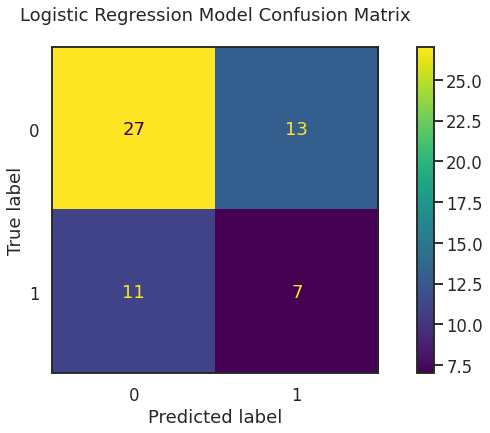

In [45]:
sns.set_theme(style="white", context='talk')
cm = confusion_matrix(y_test, y_pred, labels=model[-1].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model[-1].classes_)
disp.plot()
plt.title("Logistic Regression Model Confusion Matrix\n")
plt.show()

In [46]:
model = decision_tree
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall (Decision Tree): {100* recall:.0f}%")

y_proba = model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC (Decision Tree): {roc:.3f}")

clf_report = classification_report(y_test, y_pred)
print(clf_report)

Recall (Decision Tree): 33%
ROC AUC (Decision Tree): 0.479
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        40
           1       0.29      0.33      0.31        18

    accuracy                           0.53        58
   macro avg       0.48      0.48      0.48        58
weighted avg       0.55      0.53      0.54        58



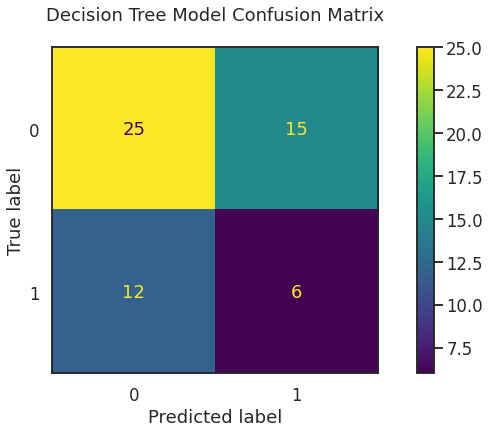

In [47]:
sns.set_theme(style="white", context='talk')
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Decision Tree Model Confusion Matrix\n")
plt.show()

In [48]:
model = random_forest
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall (Random Forest): {100* recall:.0f}%")

y_proba = model.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC (Random Forest): {roc:.3f}")

clf_report = classification_report(y_test, y_pred)
print(clf_report)

Recall (Random Forest): 39%
ROC AUC (Random Forest): 0.653
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.50      0.39      0.44        18

    accuracy                           0.69        58
   macro avg       0.62      0.61      0.61        58
weighted avg       0.67      0.69      0.68        58



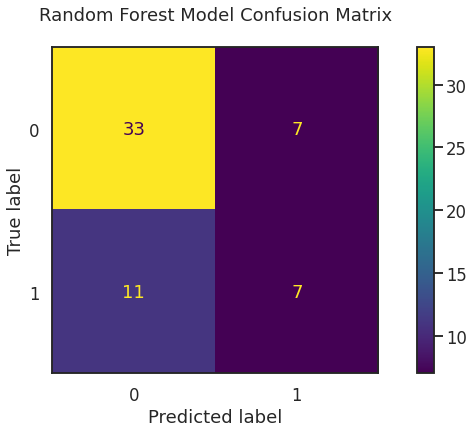

In [49]:
sns.set_theme(style="white", context='talk')
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Random Forest Model Confusion Matrix\n")
plt.show()

**Observasi**
* Model terbaik adalah Random Forest dengan nilai recall 39% dan ROC AUC 0.653.

### Hyperparameter tuning with cross validation

In [50]:
import optuna
import joblib
from optuna.samplers import TPESampler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

def cross_validation(X, y, model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(
        model, 
        X, 
        y,
        cv=cv,
        scoring=["precision", "recall", "f1", "roc_auc"],
        return_estimator=True, 
        return_train_score=True,
    )
    return round(cv_results['test_roc_auc'].mean(), 3)

def objective(trial, X, y):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20)
    }
    model = imblearn_pipeline(
        SMOTE(sampling_strategy='all', random_state=42),
        RandomForestClassifier(random_state=42, **params)
    )
    return cross_validation(X, y, model)

def fine_tuning():
    X = df3.drop(['tanggal_penilaian_karyawan', 'resign'], axis=1)
    y = df3['resign']
    
    study = optuna.create_study(
        direction='maximize',
        #directions=['maximize', 'maximize', 'maximize'],
        #sampler=TPESampler(seed=42)
    )
    func = lambda trial: objective(trial, X, y)
    study.optimize(func, n_trials=20)
    
    model_name = 'RandomForestClassifier'
    with open(f"{model_name}_study.pkl", 'wb') as f_out:
        joblib.dump(study, f_out)
        
fine_tuning()

[I 2022-08-27 10:03:08,015] A new study created in memory with name: no-name-1b166194-b459-4b20-b00d-a7cf9ab31cd2
[I 2022-08-27 10:03:08,557] Trial 0 finished with value: 0.472 and parameters: {'n_estimators': 65, 'max_depth': 17, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.472.
[I 2022-08-27 10:03:08,728] Trial 1 finished with value: 0.481 and parameters: {'n_estimators': 14, 'max_depth': 4, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.481.
[I 2022-08-27 10:03:09,204] Trial 2 finished with value: 0.466 and parameters: {'n_estimators': 62, 'max_depth': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.481.
[I 2022-08-27 10:03:09,533] Trial 3 finished with value: 0.455 and parameters: {'n_estimators': 40, 'max_depth': 8, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.481.
[I 2022-08-27 10:03:10,150] Trial 4 finished with value: 0.473 and parameters: {'n_estimators': 88, 'max_depth': 7, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.481.
[I 2022

In [51]:
def clf_report(params):
    X = df3.drop(['tanggal_penilaian_karyawan', 'resign'], axis=1)
    y = df3['resign']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
    )
    model = imblearn_pipeline(
        SMOTE(sampling_strategy='all', random_state=42),
        RandomForestClassifier(random_state=42, **params)
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f"Recall (Random Forest): {100* recall:.0f}%")

    y_proba = model.predict_proba(X_test)[:, 1]
    roc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC (Random Forest): {roc:.3f}")

    clf_report = classification_report(y_test, y_pred)
    print(clf_report)
    
    return cross_validation(X, y, model)

model_name = 'RandomForestClassifier'
with open(f"{model_name}_study.pkl", 'rb') as f_out:
    study = joblib.load(f_out)

clf_report(study.best_trial.params)

Recall (Random Forest): 39%
ROC AUC (Random Forest): 0.700
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        40
           1       0.47      0.39      0.42        18

    accuracy                           0.67        58
   macro avg       0.61      0.59      0.60        58
weighted avg       0.66      0.67      0.66        58



0.526

## Compared non-tuned and tuned model with cross validation

In [52]:
def cross_validation(X, y, model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(
        model, 
        X, 
        y,
        cv=cv,
        scoring=["accuracy", "precision", "recall", "roc_auc"],
        return_estimator=True, 
        return_train_score=True,
    )
    return cv_results

def show_eval_metrics(cv_results):
    return {
        "precision_train": f"{cv_results['train_precision'].mean():.3f}  ± {cv_results['train_precision'].std():.3f}",
        "precision_test": f"{cv_results['test_precision'].mean():.3f}  ± {cv_results['test_precision'].std():.3f}",

        "recall_train": f"{cv_results['train_recall'].mean():.3f}  ± {cv_results['train_recall'].std():.3f}",
        "recall_test": f"{cv_results['test_recall'].mean():.3f}  ± {cv_results['test_recall'].std():.3f}",

        "accuracy_train": f"{cv_results['train_accuracy'].mean():.3f}  ± {cv_results['train_accuracy'].std():.3f}",
        "accuracy_test": f"{cv_results['test_accuracy'].mean():.3f}  ± {cv_results['test_accuracy'].std():.3f}",

        "auc_train": f"{cv_results['train_roc_auc'].mean():.3f}  ± {cv_results['train_roc_auc'].std():.3f}",
        "auc_test": f"{cv_results['test_roc_auc'].mean():.3f}  ± {cv_results['test_roc_auc'].std():.3f}"
     }

In [53]:
non_tuned_model = imblearn_pipeline(
    SMOTE(sampling_strategy='all', random_state=42),
    RandomForestClassifier(random_state=42)
)
non_tuned_cv_results = cross_validation(X, y, non_tuned_model)
print("Non-tuned Model")
show_eval_metrics(non_tuned_cv_results)

Non-tuned Model


{'precision_train': '1.000  ± 0.000',
 'precision_test': '0.324  ± 0.061',
 'recall_train': '1.000  ± 0.000',
 'recall_test': '0.248  ± 0.085',
 'accuracy_train': '1.000  ± 0.000',
 'accuracy_test': '0.606  ± 0.036',
 'auc_train': '1.000  ± 0.000',
 'auc_test': '0.516  ± 0.041'}

In [54]:
tuned_model = imblearn_pipeline(
    SMOTE(sampling_strategy='all', random_state=42),
    RandomForestClassifier(random_state=42, **study.best_trial.params)
)
tuned_cv_results = cross_validation(X, y, tuned_model)
print("Tuned Model")
show_eval_metrics(tuned_cv_results)

Tuned Model


{'precision_train': '0.973  ± 0.006',
 'precision_test': '0.296  ± 0.110',
 'recall_train': '0.907  ± 0.025',
 'recall_test': '0.248  ± 0.171',
 'accuracy_train': '0.963  ± 0.008',
 'accuracy_test': '0.603  ± 0.038',
 'auc_train': '0.994  ± 0.003',
 'auc_test': '0.526  ± 0.063'}

## Evaluation Metrics Visualization

### ROC Curve

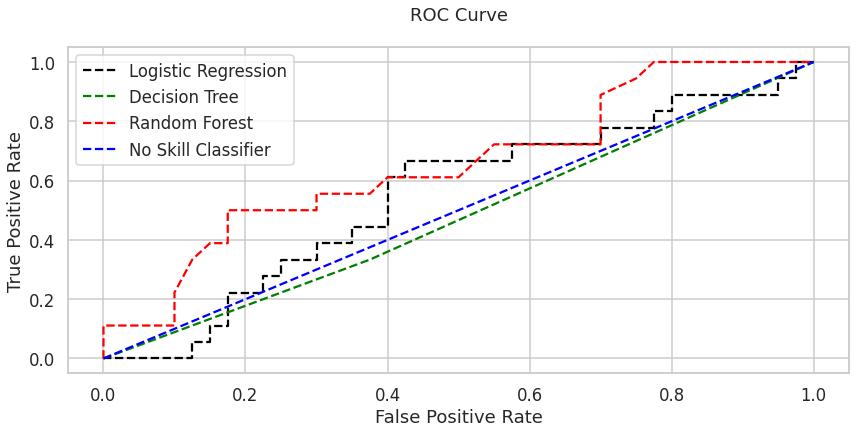

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

model = imblearn_pipeline(
    num_scaled,
    logistic_regression
)
model.fit(X_train, y_train)
pred_prob_lr = model.predict_proba(X_test)[:,1]

model = decision_tree
model.fit(X_train, y_train)
pred_prob_dt = decision_tree.predict_proba(X_test)[:,1]

model = random_forest
model.fit(X_train, y_train)
pred_prob_rf = random_forest.predict_proba(X_test)[:,1]

p_fpr, p_tpr, _ = roc_curve(y_test, [0 for i in np.arange(0, len(y_test), 1)], pos_label=1)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_lr, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_dt, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_rf, pos_label=1)

auc_score_lr = roc_auc_score(y_test, pred_prob_lr)
auc_score_dt = roc_auc_score(y_test, pred_prob_dt)
auc_score_rf = roc_auc_score(y_test, pred_prob_rf)

sns.set_theme(style="whitegrid", context='talk')
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='No Skill Classifier')
plt.title('ROC Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('roc_curve', dpi=200)
plt.show()

### Feature importance

In [56]:
#!pip install shap

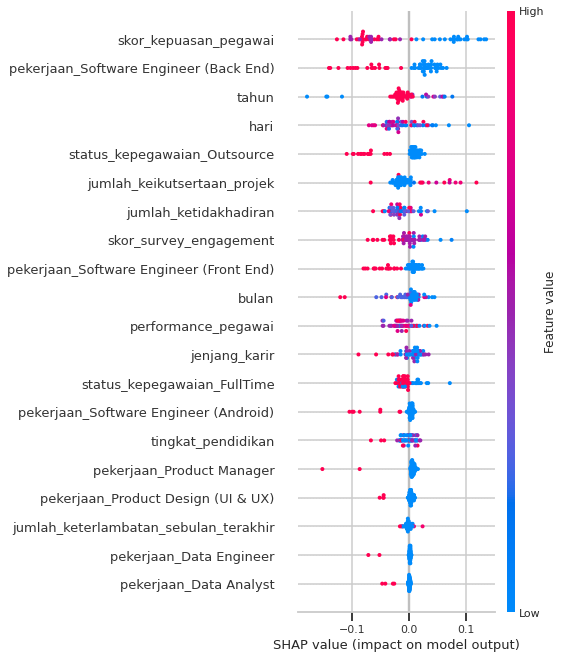

In [57]:
# load javascript visualization to show a SHAP plot in jupyter
import shap
shap.initjs()

explainer = shap.TreeExplainer(random_forest)
shap_val = explainer.shap_values(X_test)

shap.summary_plot(shap_val[1], X_test)

## Partial Dependence Plot

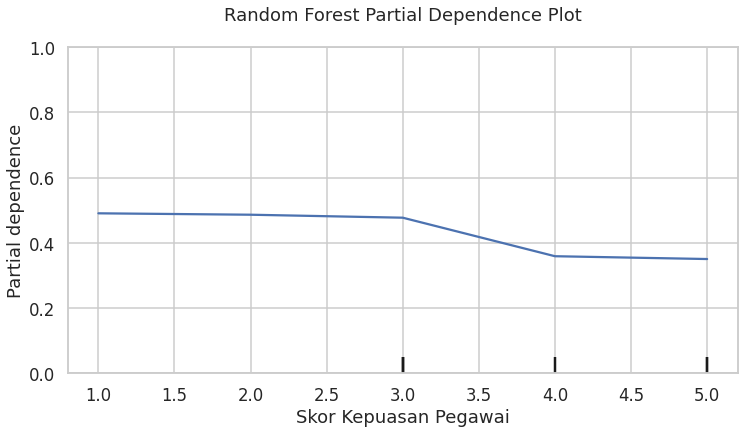

In [64]:
from sklearn.inspection import PartialDependenceDisplay

X_test_pdp = X_test.copy()
X_test_pdp = X_test.rename(columns={"skor_kepuasan_pegawai": "Skor Kepuasan Pegawai"})

feature_to_show = ["Skor Kepuasan Pegawai"]

sns.set_theme(style="whitegrid", context='talk')
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest Partial Dependence Plot\n")
pdp_display = PartialDependenceDisplay.from_estimator(random_forest, X_test_pdp, feature_to_show, ax=ax)
plt.ylim([0, 1])
plt.show()